In [2]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
eeci_colors = ['#574145','#009070','#7500a0','#ffbfeb','#00C8A4','#a800e5','#4d4e51','#BEA5A9','#ebf1f7'] # '#E50068', not using Conv

In [4]:
comp_results_file = os.path.join('..','results', 'prediction_tests_same-train-test.csv')
comp_results = pd.read_csv(comp_results_file)
de_results_file = os.path.join('..','results', 'prediction_tests_rd-train-test.csv')
de_results = pd.read_csv(de_results_file)

In [5]:
print(de_results)

              Model Name   Train Building  Forecast Time (s)  Tau (hrs)  \
0   analysis\linear_rd4y  same-train-test          40.473083         48   
1   analysis\linear_rd4y  same-train-test          40.473083         48   
2   analysis\linear_rd2y  same-train-test          40.780539         48   
3   analysis\linear_rd2y  same-train-test          40.780539         48   
4   analysis\linear_rd1y  same-train-test          39.287733         48   
5   analysis\linear_rd1y  same-train-test          39.287733         48   
6   analysis\linear_rd6m  same-train-test          36.024333         48   
7   analysis\linear_rd6m  same-train-test          36.024333         48   
8   analysis\linear_rd3m  same-train-test          36.011321         48   
9   analysis\linear_rd3m  same-train-test          36.011321         48   
10  analysis\resmlp_rd4y  same-train-test         120.344068         48   
11  analysis\resmlp_rd4y  same-train-test         120.344068         48   
12  analysis\resmlp_rd2y 

In [6]:
comp_models = [r'analysis\resmlp_0', 'analysis\linear_0', 'TFT']
rd_models = [r'analysis\resmlp_', 'analysis\linear_', 'TFT-']
model_names = ['ResMLP', 'Linear', 'TFT']
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
columns = ['P','C',*['L%s'%id for id in UCam_ids]]
rds = ['rd4y','rd2y','rd1y','rd6m','rd3m']
rd_years = [4,2,1,0.5,0.25]

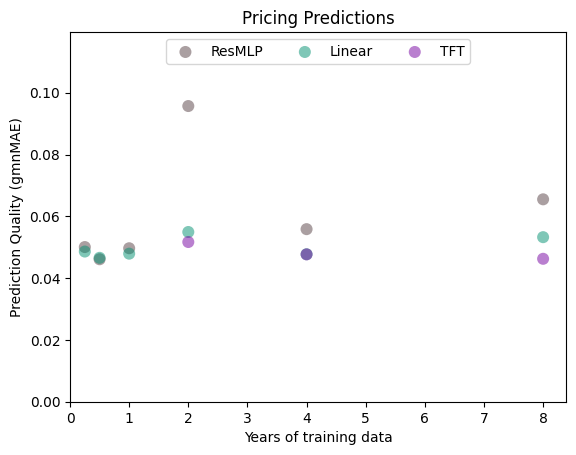

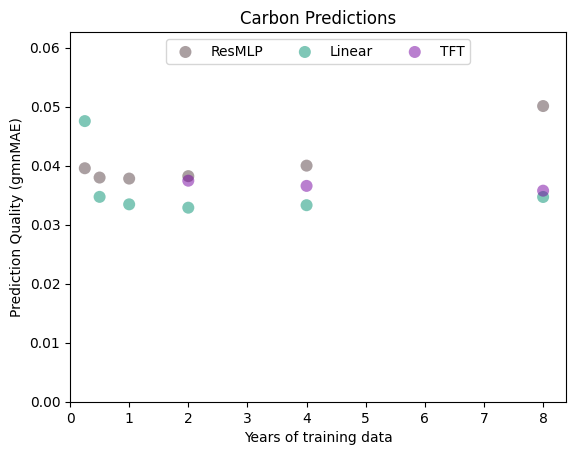

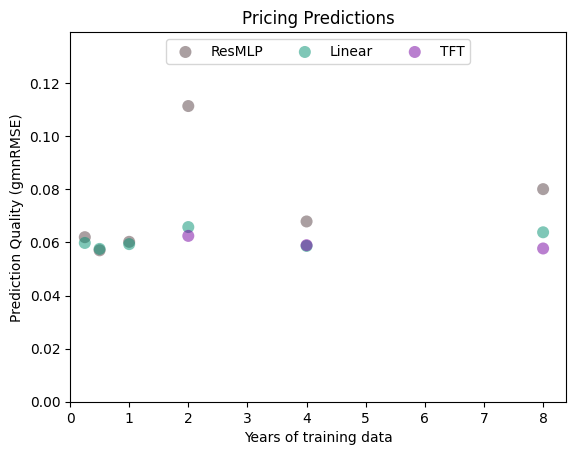

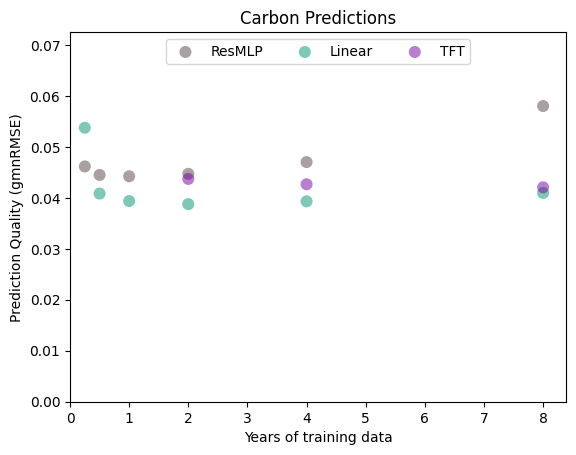

In [16]:
for metric in ['gmnMAE','gmnRMSE']:
    for var,var_name in zip(['P','C'],['Pricing','Carbon']):
        all_ys = []
        fig, ax = plt.subplots()
        for i,(comp_model,rd_model) in enumerate(zip(comp_models,rd_models)):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==comp_model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==rd_model+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (rd_model+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(xs[:len(ys)],ys,label=model_names[i],color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
        plt.xlim(0)
        plt.ylim(0,max(all_ys)*1.25)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric})')
        plt.title('%s Predictions'%var_name)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
        plt.show()

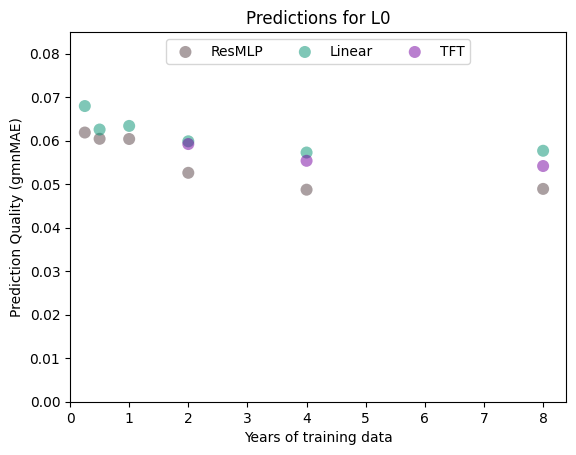

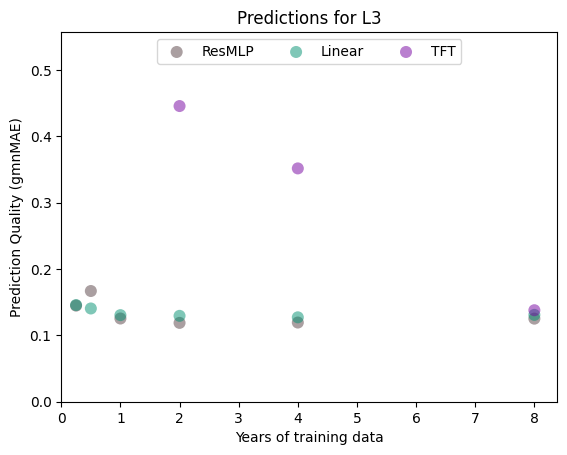

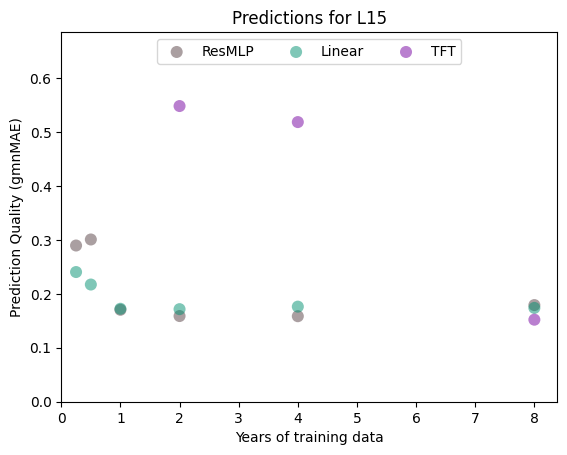

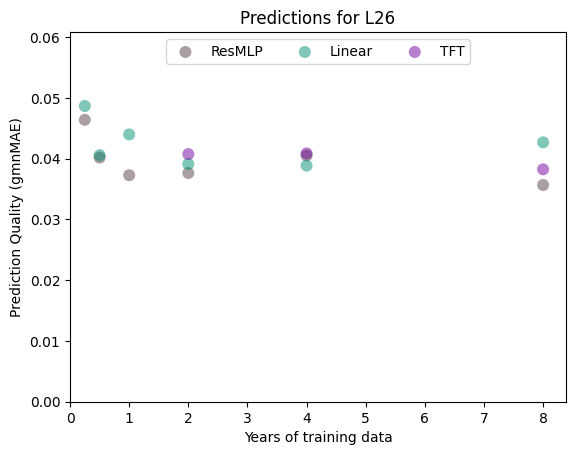

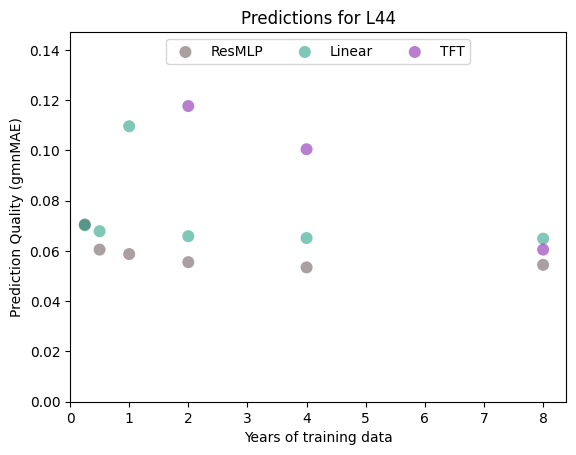

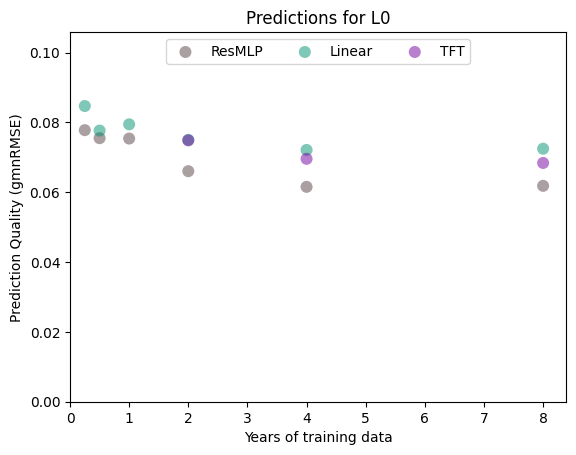

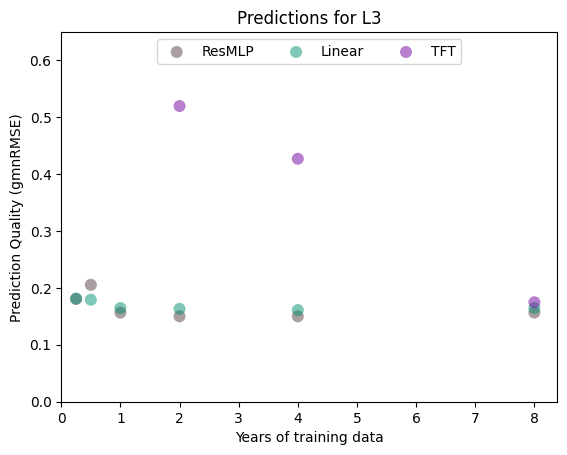

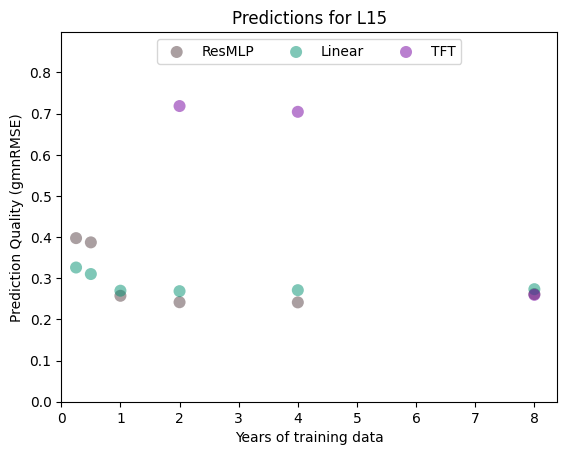

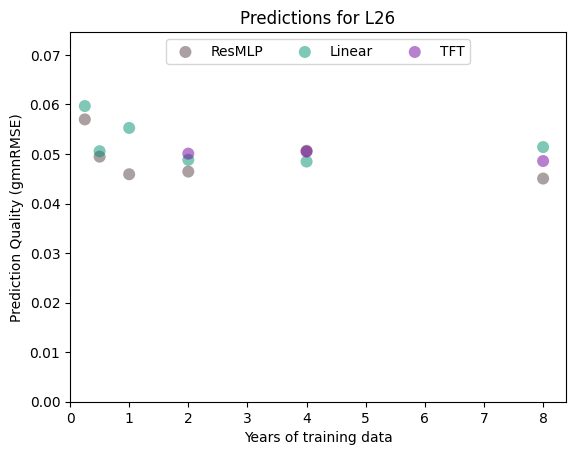

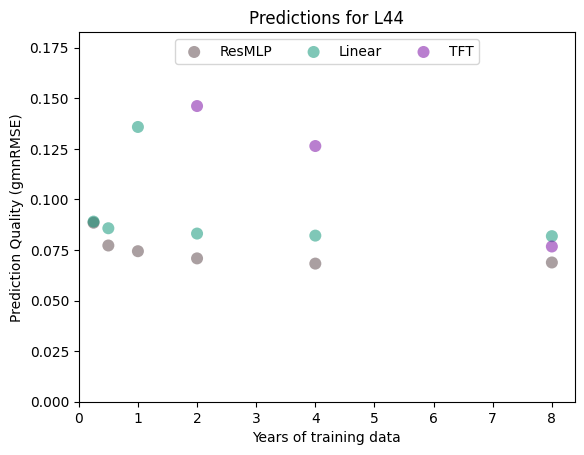

In [17]:
for metric in ['gmnMAE','gmnRMSE']:
    for var in ['L0','L3','L15','L26','L44']:
        all_ys = []
        fig, ax = plt.subplots()
        for i,(comp_model,rd_model) in enumerate(zip(comp_models,rd_models)):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==comp_model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==rd_model+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (rd_model+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(xs[:len(ys)],ys,label=model_names[i],color=eeci_colors[i], alpha=0.5, edgecolors='none',s=75)
        plt.xlim(0)
        plt.ylim(0,max(all_ys)*1.25)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric})')
        plt.title('Predictions for %s'%var)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
        plt.show()